## Athena Topakas - Draft of Code 

Scientific Question: Does the specific protein hemagglutinin (HA) in the sequence of influenza A cause a more severe reaction compared to influenza B?

Background of Protein: The protein that I have chosen to test for this project is Hemagglutinin also known as (HA). This protein is found in the virus Influenza, and it plays an important role in the early stages of the virus. The HA protein is responsible for the virus's binding to cell surface receptors and for the viral genome's liberation into the cytoplasm via membrane fusion.

Source: https://pubmed.ncbi.nlm.nih.gov/9360372/

Scientific Hypothesis: If humans have less immunity to Influenza A than they do to influenza B, then there may be structural differences in the HA protein for Influenza A and influenza B. 

Description of what analyses were done and how the data was downloaded for the project: I used the website Protein Data Bank (PDB) and National Center for Biotechnology Information (NCBI) to find my 4 different sequences. The sequences that I chose were two sequences from Influenza A (H1N1 and H3N2) and two sequences from Influenza B (Victoria and Yamagata). I combined all of my four sequences into one FASTA file to be able to do my code. 

## Draft of Code

## Multiple Sequence Alignment

In [36]:
#import sys lets us access system-specific parameters and functions
import sys
#this provides a simple uniform interface to input & output assorted sequence file formats (such as multiple sequence alignment) 
from Bio import SeqIO
#this is for multiple sequence alignment program (operating systems)
from Bio.Align.Applications import MafftCommandline
#this creates a temp file in the temp directory and returns a file object 
import tempfile

In [37]:
#variable fasta is for all my 4 sequence data
fasta = "Total-1.fasta"

In [38]:
reference = 0 
count = 0

In [20]:
# installing bioconda mafft
conda install -c bioconda mafft

Solving environment: done

## Package Plan ##

  environment location: /Users/athenatopakas/opt/anaconda3

  added / updated specs:
    - mafft


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.13.0               |   py39hecd8cb5_0         906 KB
    mafft-7.505                |       ha5712d3_0         8.9 MB  bioconda
    ------------------------------------------------------------
                                           Total:         9.8 MB

The following NEW packages will be INSTALLED:

  mafft              bioconda/osx-64::mafft-7.505-ha5712d3_0

The following packages will be UPDATED:

  conda              conda-forge::conda-4.12.0-py39h6e9494~ --> pkgs/main::conda-4.13.0-py39hecd8cb5_0



conda-4.13.0         | 906 KB    | ##################################### | 100% 
mafft-7.505          | 8.9 MB    | ##################################### | 100% 
Preparing transaction

In [34]:
#recieves a file that has a name (uses it to create a temp file)
with tempfile.NamedTemporaryFile() as temp:
    #for loop using if else
    for record in SeqIO.parse("Total-1.fasta", "fasta"):
        if count == 0:
            reference = record 
        else:
            SeqIO.write([reference, record], temp.name, "fasta")
            mafft_cline = MafftCommandline(input=temp.name)
            stdout,stderr=mafft_cline()
            print(stdout)
        count += 1
        print('\n')

>KY888464.1 Influenza A virus (A/JiangxiDonghu/1648/2013(H3N2)) segment 4 hemagglutinin (HA) gene, partial cds
ctggttttcgctcaaaaacttcctggaaatgacaatagcacggcaacgctgtgccttggg
caccatgcagtaccaaacggaacgatagtgaaaacaatcacgaatgaccgaattgaagtt
actaatgctactgagctggttcagaattcctcaataggtgaaatatgcaacagtcctcat
cagatccttgatggagaaaattgcacactaatagatgctctattgggagaccctcagtgt
gatggctttcaaaataagaaatgggacctttttgttgaacgaagcaaagcctacagcaac
tgttacccttatgatgtgccggattatgcctcccttaggtcactagttgcctcatccggc
acactggagtttaacaatgaaagcttcaattgggctggagtcactcaaaacggaacaagt
tctgcttgcataaggggatctaatagtagtttctttagtagattaaattggttgacccac
ttaaacttcaaatacccagcattgaacgtgactatgccaaacaatgaacaatttgacaaa
ttgtacatttggggggttcaccacccgggtacggacaaggaccaaatcttcctgtatgct
caatcatcaggaagaatcacagtatctaccaaaagaagccaacaagctgtaatcccgaat
atcggatctagacccagaataaggaatatccctagcagaataagcatctattggacaata
gtaaaaccgggagacatacttttgattaacagcacagggaatctaattgctcctaggggt
tacttcaaaatacgaagtgggaaaagctcaataatgagatcagatgcacccattggcaaa
tgcaagtctgaatgcatcactccaaatggaagcat

## Phylogenetic 

In [51]:
import Bio
from Bio import Phylo, AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor

Alignment with 4 rows and 1230 columns
---------GATCGAATCTGCACTGGA-ATAACATCTTCAA--A...--- KP461123.1
---------GATCGAATCTGCACTGGA-ATAACATCCTCAA--A...--- KP459386.1
CTGGTTTTCGCTCAAAAACTTCCTGGAAATGACAATAGCACGGC...--- KY888464.1
------------------------------------------GA...AGA AB451167.1
KP461123.1	0
KP459386.1	0.003252032520325243	0
KY888464.1	0.6528455284552845	0.6520325203252033	0
AB451167.1	0.6227642276422765	0.624390243902439	0.5487804878048781	0
	KP461123.1	KP459386.1	KY888464.1	AB451167.1


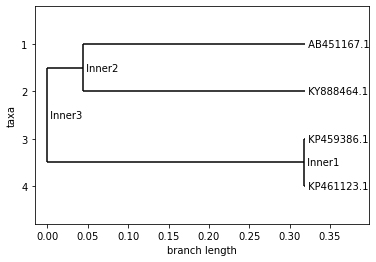

In [59]:
#Read and align query sequences
align = AlignIO.read("aln-fasta.txt", "fasta")

#Print the alignment
print(align)

#Calculate the distance matrix
calculator = DistanceCalculator('identity')
distMatrix = calculator.get_distance(align)

#Print distance matrix result
print(distMatrix)

#Creating a DistanceTreeConstructor object
constructor = DistanceTreeConstructor()

#Constructing the phylogenetic tree 
Tree = constructor.upgma(distMatrix)

#Draw the phylogenetic tree
Phylo.draw(Tree)

## Structural bioinformatics

In [7]:
#importing nglview to be able to view the structure
import nglview as nv

In [56]:
view = nv.show_pdbid("5WKO")
view

NGLWidget()

In [58]:
view = nv.show_pdbid("3BT6")
view

NGLWidget()

In [40]:
view = nv.show_pdbid("3ZTJ")
view

NGLWidget()

In [41]:
view = nv.show_pdbid("4M40")
view

NGLWidget()

## 3D Measurements

In [54]:
from Bio.PDB.PDBParser import PDBParser

In [64]:
#Influenza A H3N2
parser = PDBParser()
#Get protein structure of H3N2
structure_of_H3N2 = parser.get_structure("3ZTJ", "3ztj.pdb")
#Get the residues from the protein structure of H3N2
residues_H3N2 = [r for r in structure_of_H3N2.get_residues()]
#Calculate the distance between alpha carbons
ca1_H3N2 = residues_H3N2[0]["CA"]
ca2_H3N2 = residues_H3N2[1]["CA"]
distance_H3N2 = ca1_H3N2 - ca2_H3N2
#Print
print(distance_H1N1)

3.9006157


/Users/athenatopakas/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 42546.
  warnings.warn(
